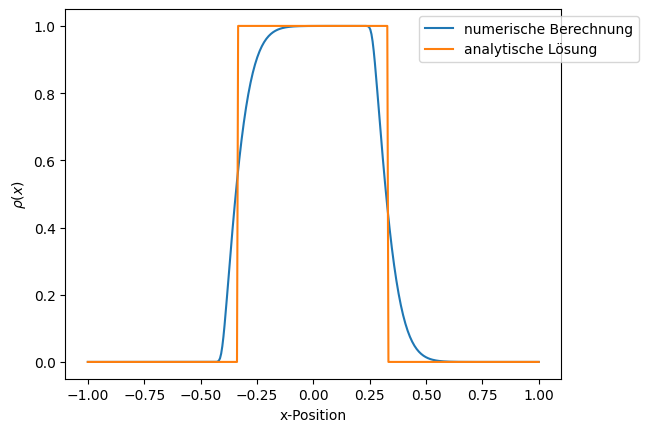

In [20]:
import numpy as np
from numba import njit, vectorize, int32, int64, float32, float64, boolean
import matplotlib.pyplot as plt
N_x = 400

t_max = 400
frame = 2
delta_x = frame/(N_x-1)
v = 1
u = np.zeros((N_x+3))
np.place(u,u==0,[v])
delta_t = 0.8*delta_x*v

d_start = np.zeros((N_x+4))
d_start[int((2/3)//delta_x+2):int((4/3)//delta_x+2)]=1


@vectorize([int64(int64, boolean, int64), float64(float64, boolean, float64)])
def place(a,b,c):
    if b==True:
        a = c
    return a

@njit
def delta_d(d):
    
    result =2*(d[2:]-d[1:-1])*(d[1:-1]-d[0:-2])
    result = place(result,result<0,0)
    denumerator= d[2:]-d[0:-2]
    # hier ersetze ich nullen durch eine 1 um nicht durch 0 zu teilen. result ist an dieser stelle sowieso 0, da für d_(j+1)=d_(j-1) sowieso die 
    # Stelle in 'result' kleiner 0 ist. (siehe van Leer Schema)
    denumerator =place(denumerator,denumerator==0,1)
    return result/denumerator
@njit
def mittel(d):
    return (d[0:-1]+d[1:])/2
    
@njit
def d_adv(d,ddelt,u):
    adv_p =d[1:-2]+(1-u[1:-1]*delta_t/delta_x)/2*ddelt[0:-1]
    adv_p = place(adv_p,u_iter[1:-1]<=0,0)
    adv_m = d[2:-1]-(1+u[1:-1]*delta_t/delta_x)/2*ddelt[1:]
    adv_m = place(adv_m,u_iter[1:-1]>0,0)
    return adv_m+adv_p
@njit
def d_int(d,u,dadv):
    
    return d[2:-2]-delta_t/delta_x*(dadv[1:]*u[2:-1]-dadv[0:-1]*u[1:-2])

@njit
def rb(x):
    endresult = np.zeros(N_x+4)
    endresult[2:-2] = x
    endresult[2] = endresult[-3]
    endresult[1] = endresult[-4]
    endresult[0] = endresult[-5]
    endresult[-2] = endresult[3]
    endresult[-1] = endresult[4]
    return endresult

@njit
def iterator():
    t_sum = [0]
    d_iter=d_start
    u_iter =u
    ddelt = np.zeros(N_x+2)

    while sum(t_sum)<t_max:
        
        t_sum.append(delta_t)
        # folgende Zeile auskommentieren für das Upwind Verfahren
        ddelt = delta_d(d_iter)
        dadv = d_adv(d_iter,ddelt,u_iter)
        d_iter = rb(d_int(d_iter,u_iter,dadv))
        
    return d_iter
            
d_iter = iterator()
pos_mark = np.arange(N_x)
pos = -1+ pos_mark*delta_x

fig, ax = plt.subplots(1,1)
ax.plot(pos,d_iter[2:-2])
ax.plot(pos,d_start[2:-2])  
ax.set_xlabel('x-Position')
ax.set_ylabel(r'$\rho(x)$')
ax.legend(['numerische Berechnung','analytische Lösung'],bbox_to_anchor=(0.7,1))
plt.show()


In [13]:
from numba import njit, vectorize, int32, int64, float32, float64, boolean
@vectorize([int32(int32, boolean, int32),int64(int64,boolean ,  int64), float32(float32, boolean,  float32), float64(float64,boolean, float64)])
def place(a,b,c):
    if b==True:
        
        a=c
    return a
d_start = np.zeros((N_x+4))
d_start[int((2/3)//delta_x+2):int((4/3)//delta_x+2)]=1
place(d_start,d_start==0,2)
def some(a):
    res = a[0:4]-a[4:8]
    place(res,a[1:5]==1,3)
    return res
some(d_start)

array([0., 0., 0., 0.])